In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from utils.data import load_tc_data
from utils.plot import make_cmap



In [2]:
load_from_scratch=True
plt.rcParams.update({
    # Use LaTeX default serif font-family.
    # https://matplotlib.org/stable/tutorials/text/usetex.html#sphx-glr-tutorials-text-usetex-py
     "font.family": "sans-serif",
     # Use specific cursive fonts.
     "font.cursive": ["Comic Neue", "Comic Sans MS"],
 })
font = {'fontname':'Comic Neue'}

In [3]:
def calculate_composite_rainfall():
    return 'hi'
    

In [4]:
# load current 1D dataset
real,inputs,pred,meta = load_tc_data(set='validation',results='ke_tracks')

# load ibtracks
tracks = pd.read_csv('/user/home/al18709/work/ibtracks/tc_files.csv')
og_tracks_grouped = tracks.groupby('sid')

# load original 2D WGAN
real_2,inputs_2,pred_2,meta_2,imput_og,pred_og,meta_og = load_tc_data(set='validation',results='kh_tracks')
real_og_x,_,_,_,_,_,pred_og_x,meta_og_x = load_tc_data(set='extreme_test',results='test')
meta_og = pd.read_csv('/user/work/al18709/tc_data_mswep_40/valid_meta.csv')
# meta_valid = pd.read_csv('/user/work/al18709/tc_data_flipped/valid_meta.csv')

# # load HighResMIP CMCC-CM2-VHR4 ssp585 NH
# CMCC_ssp585_NH_rain = np.load('/user/home/al18709/work/CMIP6/HighResMIP/CMCC-CM2-VHR4/ssp585/storm_rain/storm_rain_NH.npy')
# CMCC_ssp585_NH_lats = np.load('/user/home/al18709/work/CMIP6/HighResMIP/CMCC-CM2-VHR4/ssp585/storm_rain/storm_lats_NH.npy')
# CMCC_ssp585_NH_lons = np.load('/user/home/al18709/work/CMIP6/HighResMIP/CMCC-CM2-VHR4/ssp585/storm_rain/storm_lons_NH.npy')
# CMCC_ssp585_NH_sids = pd.read_csv('/user/home/al18709/work/CMIP6/HighResMIP/CMCC-CM2-VHR4/ssp585/storm_rain/storm_sid_NH.csv')
# print(CMCC_ssp585_NH_sids.sid.shape)
# meta_CMCC_ssp585_NH = pd.DataFrame({'sid':CMCC_ssp585_NH_sids.sid ,'centre_lat':CMCC_ssp585_NH_lats[:,4], 'centre_lon':CMCC_ssp585_NH_lons[:,4]})

# # load HighResMIP CMCC-CM2-VHR4 ssp585 SH
# CMCC_ssp585_SH_rain = np.load('/user/home/al18709/work/CMIP6/HighResMIP/CMCC-CM2-VHR4/ssp585/storm_rain/storm_rain_SH.npy')
# CMCC_ssp585_SH_lats = np.load('/user/home/al18709/work/CMIP6/HighResMIP/CMCC-CM2-VHR4/ssp585/storm_rain/storm_lats_SH.npy')
# CMCC_ssp585_SH_lons = np.load('/user/home/al18709/work/CMIP6/HighResMIP/CMCC-CM2-VHR4/ssp585/storm_rain/storm_lons_SH.npy')
# CMCC_ssp585_SH_sids = pd.read_csv('/user/home/al18709/work/CMIP6/HighResMIP/CMCC-CM2-VHR4/ssp585/storm_rain/storm_sid_SH.csv')
# print(CMCC_ssp585_SH_sids.sid.shape)
# meta_CMCC_ssp585_SH = pd.DataFrame({'sid':CMCC_ssp585_SH_sids.sid ,'centre_lat':CMCC_ssp585_SH_lats[:,4], 'centre_lon':CMCC_ssp585_SH_lons[:,4]})

# # load HighResMIP EC-EARTH-3P-HR  ssp585 NH
# ecearthhr_ssp585_NH_rain = np.load('/user/home/al18709/work/CMIP6/HighResMIP/EC-Earth3P-HR/storm_rain/ssp585/storm_rain_NH.npy')
# ecearthhr_ssp585_NH_lats = np.load('/user/home/al18709/work/CMIP6/HighResMIP/EC-Earth3P-HR/storm_rain/ssp585/storm_lats_NH.npy')
# ecearthhr_ssp585_NH_lons = np.load('/user/home/al18709/work/CMIP6/HighResMIP/EC-Earth3P-HR/storm_rain/ssp585/storm_lons_NH.npy')
# ecearthhr_ssp585_NH_sids = pd.read_csv('/user/home/al18709/work/CMIP6/HighResMIP/EC-Earth3P-HR/storm_rain/ssp585/storm_sid_NH.csv')
# print(ecearthhr_ssp585_NH_sids.sid.shape)
# meta_ecearthhr_ssp585_NH = pd.DataFrame({'sid':ecearthhr_ssp585_NH_sids.sid ,'centre_lat':ecearthhr_ssp585_NH_lats[:,4], 'centre_lon':ecearthhr_ssp585_NH_lons[:,4]})

# # load HighResMIP EC-EARTH-3P-HR ssp585 SH
# ecearthhr_ssp585_SH_rain = np.load('/user/home/al18709/work/CMIP6/HighResMIP/EC-Earth3P-HR/storm_rain/ssp585/storm_rain_SH.npy')
# ecearthhr_ssp585_SH_lats = np.load('/user/home/al18709/work/CMIP6/HighResMIP/EC-Earth3P-HR/storm_rain/ssp585/storm_lats_SH.npy')
# ecearthhr_ssp585_SH_lons = np.load('/user/home/al18709/work/CMIP6/HighResMIP/EC-Earth3P-HR/storm_rain/ssp585/storm_lons_SH.npy')
# ecearthhr_ssp585_SH_sids = pd.read_csv('/user/home/al18709/work/CMIP6/HighResMIP/EC-Earth3P-HR/storm_rain/ssp585/storm_sid_SH.csv')
# print(ecearthhr_ssp585_SH_sids.sid.shape)
# meta_ecearthhr_ssp585_SH = pd.DataFrame({'sid':ecearthhr_ssp585_SH_sids.sid ,'centre_lat':ecearthhr_ssp585_SH_lats[:,4], 'centre_lon':ecearthhr_ssp585_SH_lons[:,4]})

# # load CMIP6 ssp585 dataset 
miroc6_ssp585_rain = np.load('/user/home/al18709/work/CMIP6/MIROC6/storm_rain/ssp585/storm_rain_NH.npy')
miroc6_ssp585_lats = np.load('/user/home/al18709/work/CMIP6/MIROC6/storm_rain/ssp585/storm_lats_NH.npy')
miroc6_ssp585_lons = np.load('/user/home/al18709/work/CMIP6/MIROC6/storm_rain/ssp585/storm_lons_NH.npy')
miroc6_ssp585_sids = pd.read_csv('/user/home/al18709/work/CMIP6/MIROC6/storm_rain/ssp585/storm_sid_NH.csv')
meta_miroc6_ssp585 = pd.DataFrame({'sid':miroc6_ssp585_sids.sid ,'centre_lat':miroc6_ssp585_lats[:,4], 'centre_lon':miroc6_ssp585_lons[:,4]})

miroc6_ssp585_rain_SH = np.load('/user/home/al18709/work/CMIP6/MIROC6/storm_rain/ssp585/storm_rain_SH.npy')
miroc6_ssp585_lats_SH = np.load('/user/home/al18709/work/CMIP6/MIROC6/storm_rain/ssp585/storm_lats_SH.npy')
miroc6_ssp585_lons_SH = np.load('/user/home/al18709/work/CMIP6/MIROC6/storm_rain/ssp585/storm_lons_SH.npy')
miroc6_ssp585_sids_SH = pd.read_csv('/user/home/al18709/work/CMIP6/MIROC6/storm_rain/ssp585/storm_sid_SH.csv')
meta_miroc6_ssp585_SH = pd.DataFrame({'sid':miroc6_ssp585_sids_SH.sid ,'centre_lat':miroc6_ssp585_lats_SH[:,4], 'centre_lon':miroc6_ssp585_lons_SH[:,4]})

# CMIP6 MPI-ESM1-2-LR
mpi_ssp585_rain = np.load('/user/home/al18709/work/CMIP6/MPI-ESM1-2-LR/storm_rain/ssp585/storm_rain_NH.npy')
mpi_ssp585_lats = np.load('/user/home/al18709/work/CMIP6/MPI-ESM1-2-LR/storm_rain/ssp585/storm_lats_NH.npy')
mpi_ssp585_lons = np.load('/user/home/al18709/work/CMIP6/MPI-ESM1-2-LR/storm_rain/ssp585/storm_lons_NH.npy')
mpi_ssp585_sids = pd.read_csv('/user/home/al18709/work/CMIP6/MPI-ESM1-2-LR/storm_rain/ssp585/storm_sid_NH.csv')
meta_mpi_ssp585 = pd.DataFrame({'sid':mpi_ssp585_sids.sid ,'centre_lat':mpi_ssp585_lats[:,4], 'centre_lon':mpi_ssp585_lons[:,4]})

mpi_ssp585_rain_SH = np.load('/user/home/al18709/work/CMIP6/MPI-ESM1-2-LR/storm_rain/ssp585/storm_rain_SH.npy')
mpi_ssp585_lats_SH = np.load('/user/home/al18709/work/CMIP6/MPI-ESM1-2-LR/storm_rain/ssp585/storm_lats_SH.npy')
mpi_ssp585_lons_SH = np.load('/user/home/al18709/work/CMIP6/MPI-ESM1-2-LR/storm_rain/ssp585/storm_lons_SH.npy')
mpi_ssp585_sids_SH = pd.read_csv('/user/home/al18709/work/CMIP6/MPI-ESM1-2-LR/storm_rain/ssp585/storm_sid_SH.csv')
meta_mpi_ssp585_SH = pd.DataFrame({'sid':mpi_ssp585_sids_SH.sid ,'centre_lat':mpi_ssp585_lats_SH[:,4], 'centre_lon':mpi_ssp585_lons_SH[:,4]})

# # CMIP6 Noresm
noresm_ssp585_rain = np.load('/user/home/al18709/work/CMIP6/NorESM2-LM/storm_rain/ssp585/storm_rain_NH.npy')
noresm_ssp585_lats = np.load('/user/home/al18709/work/CMIP6/NorESM2-LM/storm_rain/ssp585/storm_lats_NH.npy')
noresm_ssp585_lons = np.load('/user/home/al18709/work/CMIP6/NorESM2-LM/storm_rain/ssp585/storm_lons_NH.npy')
noresm_ssp585_sids = pd.read_csv('/user/home/al18709/work/CMIP6/NorESM2-LM/storm_rain/ssp585/storm_sid_NH.csv')
meta_noresm_ssp585 = pd.DataFrame({'sid':noresm_ssp585_sids.sid ,'centre_lat':noresm_ssp585_lats[:,4], 'centre_lon':noresm_ssp585_lons[:,4]})

noresm_ssp585_rain_SH = np.load('/user/home/al18709/work/CMIP6/NorESM2-LM/storm_rain/ssp585/storm_rain_SH.npy')
noresm_ssp585_lats_SH = np.load('/user/home/al18709/work/CMIP6/NorESM2-LM/storm_rain/ssp585/storm_lats_SH.npy')
noresm_ssp585_lons_SH = np.load('/user/home/al18709/work/CMIP6/NorESM2-LM/storm_rain/ssp585/storm_lons_SH.npy')
noresm_ssp585_sids_SH = pd.read_csv('/user/home/al18709/work/CMIP6/NorESM2-LM/storm_rain/ssp585/storm_sid_SH.csv')
meta_noresm_ssp585_SH = pd.DataFrame({'sid':noresm_ssp585_sids_SH.sid ,'centre_lat':noresm_ssp585_lats_SH[:,4], 'centre_lon':noresm_ssp585_lons_SH[:,4]})

# # CMIP6 TaiESM1
# taiesm_ssp585_rain = np.load('/user/home/al18709/work/CMIP6/TaiESM1/storm_rain/ssp585/storm_rain_NH.npy')
# taiesm_ssp585_lats = np.load('/user/home/al18709/work/CMIP6/TaiESM1/storm_rain/ssp585/storm_lats_NH.npy')
# taiesm_ssp585_lons = np.load('/user/home/al18709/work/CMIP6/TaiESM1/storm_rain/ssp585/storm_lons_NH.npy')
# taiesm_ssp585_sids = pd.read_csv('/user/home/al18709/work/CMIP6/TaiESM1/storm_rain/ssp585/storm_sid_NH.csv')
# meta_taiesm_ssp585 = pd.DataFrame({'sid':taiesm_ssp585_sids.sid ,'centre_lat':taiesm_ssp585_lats[:,4], 'centre_lon':taiesm_ssp585_lons[:,4]})

# taiesm_ssp585_rain_SH = np.load('/user/home/al18709/work/CMIP6/TaiESM1/storm_rain/ssp585/storm_rain_SH.npy')
# taiesm_ssp585_lats_SH = np.load('/user/home/al18709/work/CMIP6/TaiESM1/storm_rain/ssp585/storm_lats_SH.npy')
# taiesm_ssp585_lons_SH = np.load('/user/home/al18709/work/CMIP6/TaiESM1/storm_rain/ssp585/storm_lons_SH.npy')
# taiesm_ssp585_sids_SH = pd.read_csv('/user/home/al18709/work/CMIP6/TaiESM1/storm_rain/ssp585/storm_sid_SH.csv')
# meta_taiesm_ssp585_SH = pd.DataFrame({'sid':taiesm_ssp585_sids_SH.sid ,'centre_lat':taiesm_ssp585_lats_SH[:,4], 'centre_lon':taiesm_ssp585_lons_SH[:,4]})

# CMIP6 IPSL
ipsl_ssp585_rain = np.load('/user/home/al18709/work/CMIP6/IPSL-CM6A-LR/storm_rain/ssp585/storm_rain_NH.npy')
ipsl_ssp585_lats = np.load('/user/home/al18709/work/CMIP6/IPSL-CM6A-LR/storm_rain/ssp585/storm_lats_NH.npy')
ipsl_ssp585_lons = np.load('/user/home/al18709/work/CMIP6/IPSL-CM6A-LR/storm_rain/ssp585/storm_lons_NH.npy')
ipsl_ssp585_sids = pd.read_csv('/user/home/al18709/work/CMIP6/IPSL-CM6A-LR/storm_rain/ssp585/storm_sid_NH.csv')
meta_ipsl_ssp585 = pd.DataFrame({'sid':ipsl_ssp585_sids.sid ,'centre_lat':ipsl_ssp585_lats[:,4], 'centre_lon':ipsl_ssp585_lons[:,4]})

ipsl_ssp585_rain_SH = np.load('/user/home/al18709/work/CMIP6/IPSL-CM6A-LR/storm_rain/ssp585/storm_rain_SH.npy')
ipsl_ssp585_lats_SH = np.load('/user/home/al18709/work/CMIP6/IPSL-CM6A-LR/storm_rain/ssp585/storm_lats_SH.npy')
ipsl_ssp585_lons_SH = np.load('/user/home/al18709/work/CMIP6/IPSL-CM6A-LR/storm_rain/ssp585/storm_lons_SH.npy')
ipsl_ssp585_sids_SH = pd.read_csv('/user/home/al18709/work/CMIP6/IPSL-CM6A-LR/storm_rain/ssp585/storm_sid_SH.csv')
meta_ipsl_ssp585_SH = pd.DataFrame({'sid':ipsl_ssp585_sids_SH.sid ,'centre_lat':ipsl_ssp585_lats_SH[:,4], 'centre_lon':ipsl_ssp585_lons_SH[:,4]})

# CMIP6 mri
mri_ssp585_rain = np.load('/user/home/al18709/work/CMIP6/MRI-ESM2-0/storm_rain/ssp585/storm_rain_NH.npy')
mri_ssp585_lats = np.load('/user/home/al18709/work/CMIP6/MRI-ESM2-0/storm_rain/ssp585/storm_lats_NH.npy')
mri_ssp585_lons = np.load('/user/home/al18709/work/CMIP6/MRI-ESM2-0/storm_rain/ssp585/storm_lons_NH.npy')
mri_ssp585_sids = pd.read_csv('/user/home/al18709/work/CMIP6/MRI-ESM2-0/storm_rain/ssp585/storm_sid_NH.csv')
meta_mri_ssp585 = pd.DataFrame({'sid':mri_ssp585_sids.sid ,'centre_lat':mri_ssp585_lats[:,4], 'centre_lon':mri_ssp585_lons[:,4]})

mri_ssp585_rain_SH = np.load('/user/home/al18709/work/CMIP6/MRI-ESM2-0/storm_rain/ssp585/storm_rain_SH.npy')
mri_ssp585_lats_SH = np.load('/user/home/al18709/work/CMIP6/MRI-ESM2-0/storm_rain/ssp585/storm_lats_SH.npy')
mri_ssp585_lons_SH = np.load('/user/home/al18709/work/CMIP6/MRI-ESM2-0/storm_rain/ssp585/storm_lons_SH.npy')
mri_ssp585_sids_SH = pd.read_csv('/user/home/al18709/work/CMIP6/MRI-ESM2-0/storm_rain/ssp585/storm_sid_SH.csv')
meta_mri_ssp585_SH = pd.DataFrame({'sid':mri_ssp585_sids_SH.sid ,'centre_lat':mri_ssp585_lats_SH[:,4], 'centre_lon':mri_ssp585_lons_SH[:,4]})

# CMIP6 EC-Earth
ecearth_ssp585_rain = np.load('/user/home/al18709/work/CMIP6/EC-Earth3/storm_rain/ssp585/storm_rain_NH.npy')
ecearth_ssp585_lats = np.load('/user/home/al18709/work/CMIP6/EC-Earth3/storm_rain/ssp585/storm_lats_NH.npy')
ecearth_ssp585_lons = np.load('/user/home/al18709/work/CMIP6/EC-Earth3/storm_rain/ssp585/storm_lons_NH.npy')
ecearth_ssp585_sids = pd.read_csv('/user/home/al18709/work/CMIP6/EC-Earth3/storm_rain/ssp585/storm_sid_NH.csv')
meta_ecearth_ssp585 = pd.DataFrame({'sid':ecearth_ssp585_sids.sid ,'centre_lat':ecearth_ssp585_lats[:,4], 'centre_lon':ecearth_ssp585_lons[:,4]})

ecearth_ssp585_rain_SH = np.load('/user/home/al18709/work/CMIP6/EC-Earth3/storm_rain/ssp585/storm_rain_SH.npy')
ecearth_ssp585_lats_SH = np.load('/user/home/al18709/work/CMIP6/EC-Earth3/storm_rain/ssp585/storm_lats_SH.npy')
ecearth_ssp585_lons_SH = np.load('/user/home/al18709/work/CMIP6/EC-Earth3/storm_rain/ssp585/storm_lons_SH.npy')
ecearth_ssp585_sids_SH = pd.read_csv('/user/home/al18709/work/CMIP6/EC-Earth3/storm_rain/ssp585/storm_sid_SH.csv')
meta_ecearth_ssp585_SH = pd.DataFrame({'sid':ecearth_ssp585_sids_SH.sid ,'centre_lat':ecearth_ssp585_lats_SH[:,4], 'centre_lon':ecearth_ssp585_lons_SH[:,4]})




In [5]:
# CMIP6 CMCC_LR
cmcclr_ssp585_rain = np.load('/user/home/al18709/work/CMIP6/CMCC-ESM2/storm_rain/ssp585/storm_rain_NH.npy')
cmcclr_ssp585_lats = np.load('/user/home/al18709/work/CMIP6/CMCC-ESM2/storm_rain/ssp585/storm_lats_NH.npy')
cmcclr_ssp585_lons = np.load('/user/home/al18709/work/CMIP6/CMCC-ESM2/storm_rain/ssp585/storm_lons_NH.npy')
cmcclr_ssp585_sids = pd.read_csv('/user/home/al18709/work/CMIP6/CMCC-ESM2/storm_rain/ssp585/storm_sid_NH.csv')
meta_cmcclr_ssp585 = pd.DataFrame({'sid':cmcclr_ssp585_sids.sid ,'centre_lat':cmcclr_ssp585_lats[:,4], 'centre_lon':cmcclr_ssp585_lons[:,4]})

cmcclr_ssp585_rain_SH = np.load('/user/home/al18709/work/CMIP6/CMCC-ESM2/storm_rain/ssp585/storm_rain_SH.npy')
cmcclr_ssp585_lats_SH = np.load('/user/home/al18709/work/CMIP6/CMCC-ESM2/storm_rain/ssp585/storm_lats_SH.npy')
cmcclr_ssp585_lons_SH = np.load('/user/home/al18709/work/CMIP6/CMCC-ESM2/storm_rain/ssp585/storm_lons_SH.npy')
cmcclr_ssp585_sids_SH = pd.read_csv('/user/home/al18709/work/CMIP6/CMCC-ESM2/storm_rain/ssp585/storm_sid_SH.csv')
meta_cmcclr_ssp585_SH = pd.DataFrame({'sid':cmcclr_ssp585_sids_SH.sid ,'centre_lat':cmcclr_ssp585_lats_SH[:,4], 'centre_lon':cmcclr_ssp585_lons_SH[:,4]})

# # CMIP6 BCC-CSM2-MR
# bcc_ssp585_rain = np.load('/user/home/al18709/work/CMIP6/BCC-CSM2-MR/storm_rain/ssp585/storm_rain_NH.npy')
# bcc_ssp585_lats = np.load('/user/home/al18709/work/CMIP6/BCC-CSM2-MR/storm_rain/ssp585/storm_lats_NH.npy')
# bcc_ssp585_lons = np.load('/user/home/al18709/work/CMIP6/BCC-CSM2-MR/storm_rain/ssp585/storm_lons_NH.npy')
# bcc_ssp585_sids = pd.read_csv('/user/home/al18709/work/CMIP6/BCC-CSM2-MR/storm_rain/ssp585/storm_sid_NH.csv')
# meta_bcc_ssp585 = pd.DataFrame({'sid':bcc_ssp585_sids.sid ,'centre_lat':bcc_ssp585_lats[:,4], 'centre_lon':bcc_ssp585_lons[:,4]})

# bcc_ssp585_rain_SH = np.load('/user/home/al18709/work/CMIP6/BCC-CSM2-MR/storm_rain/ssp585/storm_rain_SH.npy')
# bcc_ssp585_lats_SH = np.load('/user/home/al18709/work/CMIP6/BCC-CSM2-MR/storm_rain/ssp585/storm_lats_SH.npy')
# bcc_ssp585_lons_SH = np.load('/user/home/al18709/work/CMIP6/BCC-CSM2-MR/storm_rain/ssp585/storm_lons_SH.npy')
# bcc_ssp585_sids_SH = pd.read_csv('/user/home/al18709/work/CMIP6/BCC-CSM2-MR/storm_rain/ssp585/storm_sid_SH.csv')
# meta_bcc_ssp585_SH = pd.DataFrame({'sid':bcc_ssp585_sids_SH.sid ,'centre_lat':bcc_ssp585_lats_SH[:,4], 'centre_lon':bcc_ssp585_lons_SH[:,4]})

# CMIP6 NESM3
nems_ssp585_rain = np.load('/user/home/al18709/work/CMIP6/NESM3/storm_rain/ssp585/storm_rain_NH.npy')
nems_ssp585_lats = np.load('/user/home/al18709/work/CMIP6/NESM3/storm_rain/ssp585/storm_lats_NH.npy')
nems_ssp585_lons = np.load('/user/home/al18709/work/CMIP6/NESM3/storm_rain/ssp585/storm_lons_NH.npy')
nems_ssp585_sids = pd.read_csv('/user/home/al18709/work/CMIP6/NESM3/storm_rain/ssp585/storm_sid_NH.csv')
meta_nems_ssp585 = pd.DataFrame({'sid':nems_ssp585_sids.sid ,'centre_lat':nems_ssp585_lats[:,4], 'centre_lon':nems_ssp585_lons[:,4]})

nems_ssp585_rain_SH = np.load('/user/home/al18709/work/CMIP6/NESM3/storm_rain/ssp585/storm_rain_SH.npy')
nems_ssp585_lats_SH = np.load('/user/home/al18709/work/CMIP6/NESM3/storm_rain/ssp585/storm_lats_SH.npy')
nems_ssp585_lons_SH = np.load('/user/home/al18709/work/CMIP6/NESM3/storm_rain/ssp585/storm_lons_SH.npy')
nems_ssp585_sids_SH = pd.read_csv('/user/home/al18709/work/CMIP6/NESM3/storm_rain/ssp585/storm_sid_SH.csv')
meta_nems_ssp585_SH = pd.DataFrame({'sid':nems_ssp585_sids_SH.sid ,'centre_lat':nems_ssp585_lats_SH[:,4], 'centre_lon':nems_ssp585_lons_SH[:,4]})

In [6]:
# print(MPI_hist_NH_rain.shape)
# print(MPI_hist_NH_sids)

# print(ipsl_hist_sids)
# print(noresm_hist_sids)

# print(noresm_hist_rain.shape)

In [7]:
# plt.imshow(hrmip_rain_NH[10,:,:])
# # print(mpi_hist_rain_SH)
# rains = mpi_hist_rain[-10,:,:]
# im = plt.contourf(rains,cmap=precip_cmap,levels=[0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30],extend='max')
# # im = plt.contourf(rains,levels=[0.0,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0],extend='max')
# plt.colorbar(im,ticks=[0,5,10,15,20,25,30])
# # plt.colorbar(im,ticks=[0.0,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0])
# plt.annotate('Max: %.1f' % np.max(rains), xy = (90,90), xytext=(70,3),fontsize=14, color='#586985')
# # plt.clf()
# # print(noresm_hist_sids.month[1610])
# # print(mpi_hist_lats_SH[0])
# print(rains)


In [8]:
# im = plt.imshow(real[2000,:,:,0],cmap=precip_cmap)
# plt.colorbar(im,ticks=[0,25,10,15,20,25,30,35,40,45,50])
# plt.annotate('Max: %.1f' % np.max(real[2000,:,:,0]), xy = (90,90), xytext=(70,3),fontsize=14, color='#586985')

In [9]:
# print(cmip6_sids_SH)
# print(meta_cmip6_hist_SH)
# print(meta_cmip6_hist)
# print(meta_hrmip_hist)
# print(meta_hrmip_hist_SH)
# sids shouldn't be 0
# print(meta)




In [10]:
# load dataset
# load data
def generate_composite_rainfall(meta,rain,ibtracks=False,time_sample_rate=False,rain_rate=False):
	
	# get subset of storms
	sids = meta.sid
	sids_unique=sids.drop_duplicates()
	nstorms = len(sids_unique)
	# avg_timesteps = len(sids)/nstorms
	tracks_grouped = meta.groupby('sid')
	composite_storm_rain = np.zeros((nstorms,100,100))
	i=0
	drop_idx=[]
	south_idx=[]
	north_idx=[]
	# find time frequency
	for sid in sids_unique:
		storm = tracks_grouped.get_group(sid)
		if ibtracks != False:
			storm_full = ibtracks.get_group(sid)
		else:
			storm_full = storm

		if time_sample_rate==False:
			
			hourly_rate=[]
			for h in storm_full.hour:
				if h in [3,9,15,21]:
					hour_rate = 3
				elif h in [0,6,12,18]:
					hour_rate = 6
				else:
					hour_rate = 0
				
				hourly_rate.append(hour_rate)

			# calculate hourly rates
			if set(hourly_rate) == {3,6}:
				# calculate storm duration as time rate (3 or 6 hourly time points) * number of time points
				storm_duration = 3 * len(storm) # this gives how many hours storm was alive for as a TC
				# define unit converstion as rain/storm_duration (number of hours) * 24 to get daily rain rate
				units_converter = 24/storm_duration

			elif 6 in set(hourly_rate): # so this means one datapoint every 6 hours
				storm_duration = 6 * len(storm) # this gives how many hours storm was alive for as a TC
				# need to multiply the rain by 2 because units are mm/3h, right now only accounting for half the rain, so multiplying by 2 is interpolating for rain between values
				units_converter = 24 * 2/storm_duration
			else:
				print('storm set is strange')
				print(set(hourly_rate))
				units_converter = 0
		else:
			
			storm_duration = time_sample_rate * len(storm)
			# if rain_rate == False: # if rain is sampled at same time as track
			units_converter = 24 / storm_duration
			# else: # otherwise rain is counted 3 hourly so needs to be doubled as tracks are counted 6 hourly so we're missing out on half the rain
			# 	units_converter = 24*rain_rate / storm_duration

		storm_lats = storm.centre_lat
		storm_lons = storm.centre_lon
		# print(storm.index)
		storm_rain = rain[storm.index,:,:,0]
		mean_storm_rain = np.sum(storm_rain,axis=0)*units_converter
		# storm_month = storm.month
		# storm_year = storm.year
		# storm_v = storm.v
		if units_converter == 0:
			drop_idx.append(i)
		else:
			if np.sum(storm_lats) < 0:
				south_idx.append(i)
			else:
				north_idx.append(i)
		

		composite_storm_rain[i,:,:] = mean_storm_rain
		i=i+1

	# save plottable dataset
	# composite_rainfall = calculate_composite_rainfall()
	# delete timestamps we can't use
	# np.delete(composite_storm_rain,drop_idx,axis=0)
	# get nh and sh datasets
	composite_storm_rain_nh = composite_storm_rain[north_idx,:,:]
	composite_storm_rain_sh = composite_storm_rain[south_idx,:,:]
	# print(composite_storm_rain.shape)
	# print(composite_storm_rain_nh.shape)
	# print(composite_storm_rain_sh.shape)
	composite_nh = np.mean(composite_storm_rain_nh,axis=0)
	composite_sh = np.mean(composite_storm_rain_sh,axis=0)
	return composite_nh,composite_sh,len(north_idx),len(south_idx)




In [11]:
# # Obs and WGAN
# composite_nh,composite_sh,nstorms_nh,nstorms_sh = generate_composite_rainfall(meta,real,ibtracks=og_tracks_grouped)
# composite_nh_x,composite_sh_x,nstorms_x_nh,nstorms_x_sh = generate_composite_rainfall(meta_og_x,np.expand_dims(real_og_x,axis=-1),ibtracks=og_tracks_grouped)
# composite_wgan_nh,composite_wgan_sh,nstorms_wgan_nh,nstorms_wgan_sh = generate_composite_rainfall(meta,pred,ibtracks=og_tracks_grouped)
# composite_og_nh,composite_og_sh,nstorms_og_nh,nstorms_og_sh = generate_composite_rainfall(meta_og,pred_og,ibtracks=og_tracks_grouped)
# composite_og_x_nh,composite_og_x_sh,nstorms_og_x_sh,nstorms_og_x_sh = generate_composite_rainfall(meta_og_x,pred_og_x,ibtracks=og_tracks_grouped)

# # HighResMIP
# composite_CMCC_ssp585_NH,_,nstorms_CMCC_ssp585_nh,_ = generate_composite_rainfall(meta_CMCC_ssp585_NH,np.expand_dims(CMCC_ssp585_NH_rain,axis=-1),ibtracks=False,time_sample_rate=6)
# _,composite_CMCC_ssp585_SH,_,nstorms_CMCC_ssp585_sh = generate_composite_rainfall(meta_CMCC_ssp585_SH,np.expand_dims(CMCC_ssp585_SH_rain,axis=-1),ibtracks=False,time_sample_rate=6)

# composite_ecearthhr_ssp585_NH,_,nstorms_ecearthhr_ssp585_nh,_ = generate_composite_rainfall(meta_ecearthhr_ssp585_NH,np.expand_dims(ecearthhr_ssp585_NH_rain,axis=-1),ibtracks=False,time_sample_rate=6)
# _,composite_ecearthhr_ssp585_SH,_,nstorms_ecearthhr_ssp585_sh = generate_composite_rainfall(meta_ecearthhr_ssp585_SH,np.expand_dims(ecearthhr_ssp585_SH_rain,axis=-1),ibtracks=False,time_sample_rate=6)

# CMIP6
composite_miroc6_ssp585_nh,_,nstorms_miroc6_ssp585_nh,_ = generate_composite_rainfall(meta_miroc6_ssp585,np.expand_dims(miroc6_ssp585_rain,axis=-1),ibtracks=False,time_sample_rate=6)
_,composite_miroc6_ssp585_sh,_,nstorms_miroc6_ssp585_sh = generate_composite_rainfall(meta_miroc6_ssp585_SH,np.expand_dims(miroc6_ssp585_rain_SH,axis=-1),ibtracks=False,time_sample_rate=6)

composite_mpi_ssp585_nh,_,nstorms_mpi_ssp585_nh,_ = generate_composite_rainfall(meta_mpi_ssp585,np.expand_dims(mpi_ssp585_rain,axis=-1),ibtracks=False,time_sample_rate=6,rain_rate=2)
_,composite_mpi_ssp585_sh,_,nstorms_mpi_ssp585_sh = generate_composite_rainfall(meta_mpi_ssp585_SH,np.expand_dims(mpi_ssp585_rain_SH,axis=-1),ibtracks=False,time_sample_rate=6,rain_rate=2)

composite_noresm_ssp585_nh,_,nstorms_noresm_ssp585_nh,_ = generate_composite_rainfall(meta_noresm_ssp585,np.expand_dims(noresm_ssp585_rain,axis=-1),ibtracks=False,time_sample_rate=6)
_,composite_noresm_ssp585_sh,_,nstorms_noresm_ssp585_sh = generate_composite_rainfall(meta_noresm_ssp585_SH,np.expand_dims(noresm_ssp585_rain_SH,axis=-1),ibtracks=False,time_sample_rate=6)

# composite_taiesm_ssp585_nh,_,nstorms_taiesm_ssp585_nh,_ = generate_composite_rainfall(meta_taiesm_ssp585,np.expand_dims(taiesm_ssp585_rain,axis=-1),ibtracks=False,time_sample_rate=6)
# _,composite_taiesm_ssp585_sh,_,nstorms_taiesm_ssp585_sh = generate_composite_rainfall(meta_taiesm_ssp585_SH,np.expand_dims(taiesm_ssp585_rain_SH,axis=-1),ibtracks=False,time_sample_rate=6)

composite_ipsl_ssp585_nh,_,nstorms_ipsl_ssp585_nh,_ = generate_composite_rainfall(meta_ipsl_ssp585,np.expand_dims(ipsl_ssp585_rain,axis=-1),ibtracks=False,time_sample_rate=6)
_,composite_ipsl_ssp585_sh,_,nstorms_ipsl_ssp585_sh = generate_composite_rainfall(meta_ipsl_ssp585_SH,np.expand_dims(ipsl_ssp585_rain_SH,axis=-1),ibtracks=False,time_sample_rate=6)

composite_mri_ssp585_nh,_,nstorms_mri_ssp585_nh,_ = generate_composite_rainfall(meta_mri_ssp585,np.expand_dims(mri_ssp585_rain,axis=-1),ibtracks=False,time_sample_rate=6)
_,composite_mri_ssp585_sh,_,nstorms_mri_ssp585_sh = generate_composite_rainfall(meta_mri_ssp585_SH,np.expand_dims(mri_ssp585_rain_SH,axis=-1),ibtracks=False,time_sample_rate=6)

composite_ecearth_ssp585_nh,_,nstorms_ecearth_ssp585_nh,_ = generate_composite_rainfall(meta_ecearth_ssp585,np.expand_dims(ecearth_ssp585_rain,axis=-1),ibtracks=False,time_sample_rate=6)
_,composite_ecearth_ssp585_sh,_,nstorms_ecearth_ssp585_sh = generate_composite_rainfall(meta_ecearth_ssp585_SH,np.expand_dims(ecearth_ssp585_rain_SH,axis=-1),ibtracks=False,time_sample_rate=6)

composite_cmcclr_ssp585_nh,_,nstorms_cmcclr_ssp585_nh,_ = generate_composite_rainfall(meta_cmcclr_ssp585,np.expand_dims(cmcclr_ssp585_rain,axis=-1),ibtracks=False,time_sample_rate=6)
_,composite_cmcclr_ssp585_sh,_,nstorms_cmcclr_ssp585_sh = generate_composite_rainfall(meta_cmcclr_ssp585_SH,np.expand_dims(cmcclr_ssp585_rain_SH,axis=-1),ibtracks=False,time_sample_rate=6)

# composite_bcc_ssp585_nh,_,nstorms_bcc_ssp585_nh,_ = generate_composite_rainfall(meta_bcc_ssp585,np.expand_dims(bcc_ssp585_rain,axis=-1),ibtracks=False,time_sample_rate=6)
# _,composite_bcc_ssp585_sh,_,nstorms_bcc_ssp585_sh = generate_composite_rainfall(meta_bcc_ssp585_SH,np.expand_dims(bcc_ssp585_rain_SH,axis=-1),ibtracks=False,time_sample_rate=6)

composite_nems_ssp585_nh,_,nstorms_nems_ssp585_nh,_ = generate_composite_rainfall(meta_nems_ssp585,np.expand_dims(nems_ssp585_rain,axis=-1),ibtracks=False,time_sample_rate=6)
_,composite_nems_ssp585_sh,_,nstorms_nems_ssp585_sh = generate_composite_rainfall(meta_nems_ssp585_SH,np.expand_dims(nems_ssp585_rain_SH,axis=-1),ibtracks=False,time_sample_rate=6)


/user/work/al18709/.conda/envs/jungle/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/user/work/al18709/.conda/envs/jungle/lib/python3.11/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/user/work/al18709/.conda/envs/jungle/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/user/work/al18709/.conda/envs/jungle/lib/python3.11/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/user/work/al18709/.conda/envs/jungle/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/user/work/al18709/.conda/envs/jungle/lib/python3.11/site-packages/numpy/core/_methods.py:121: Ru

In [12]:
# define cmap
precip_cmap,precip_norm = make_cmap()

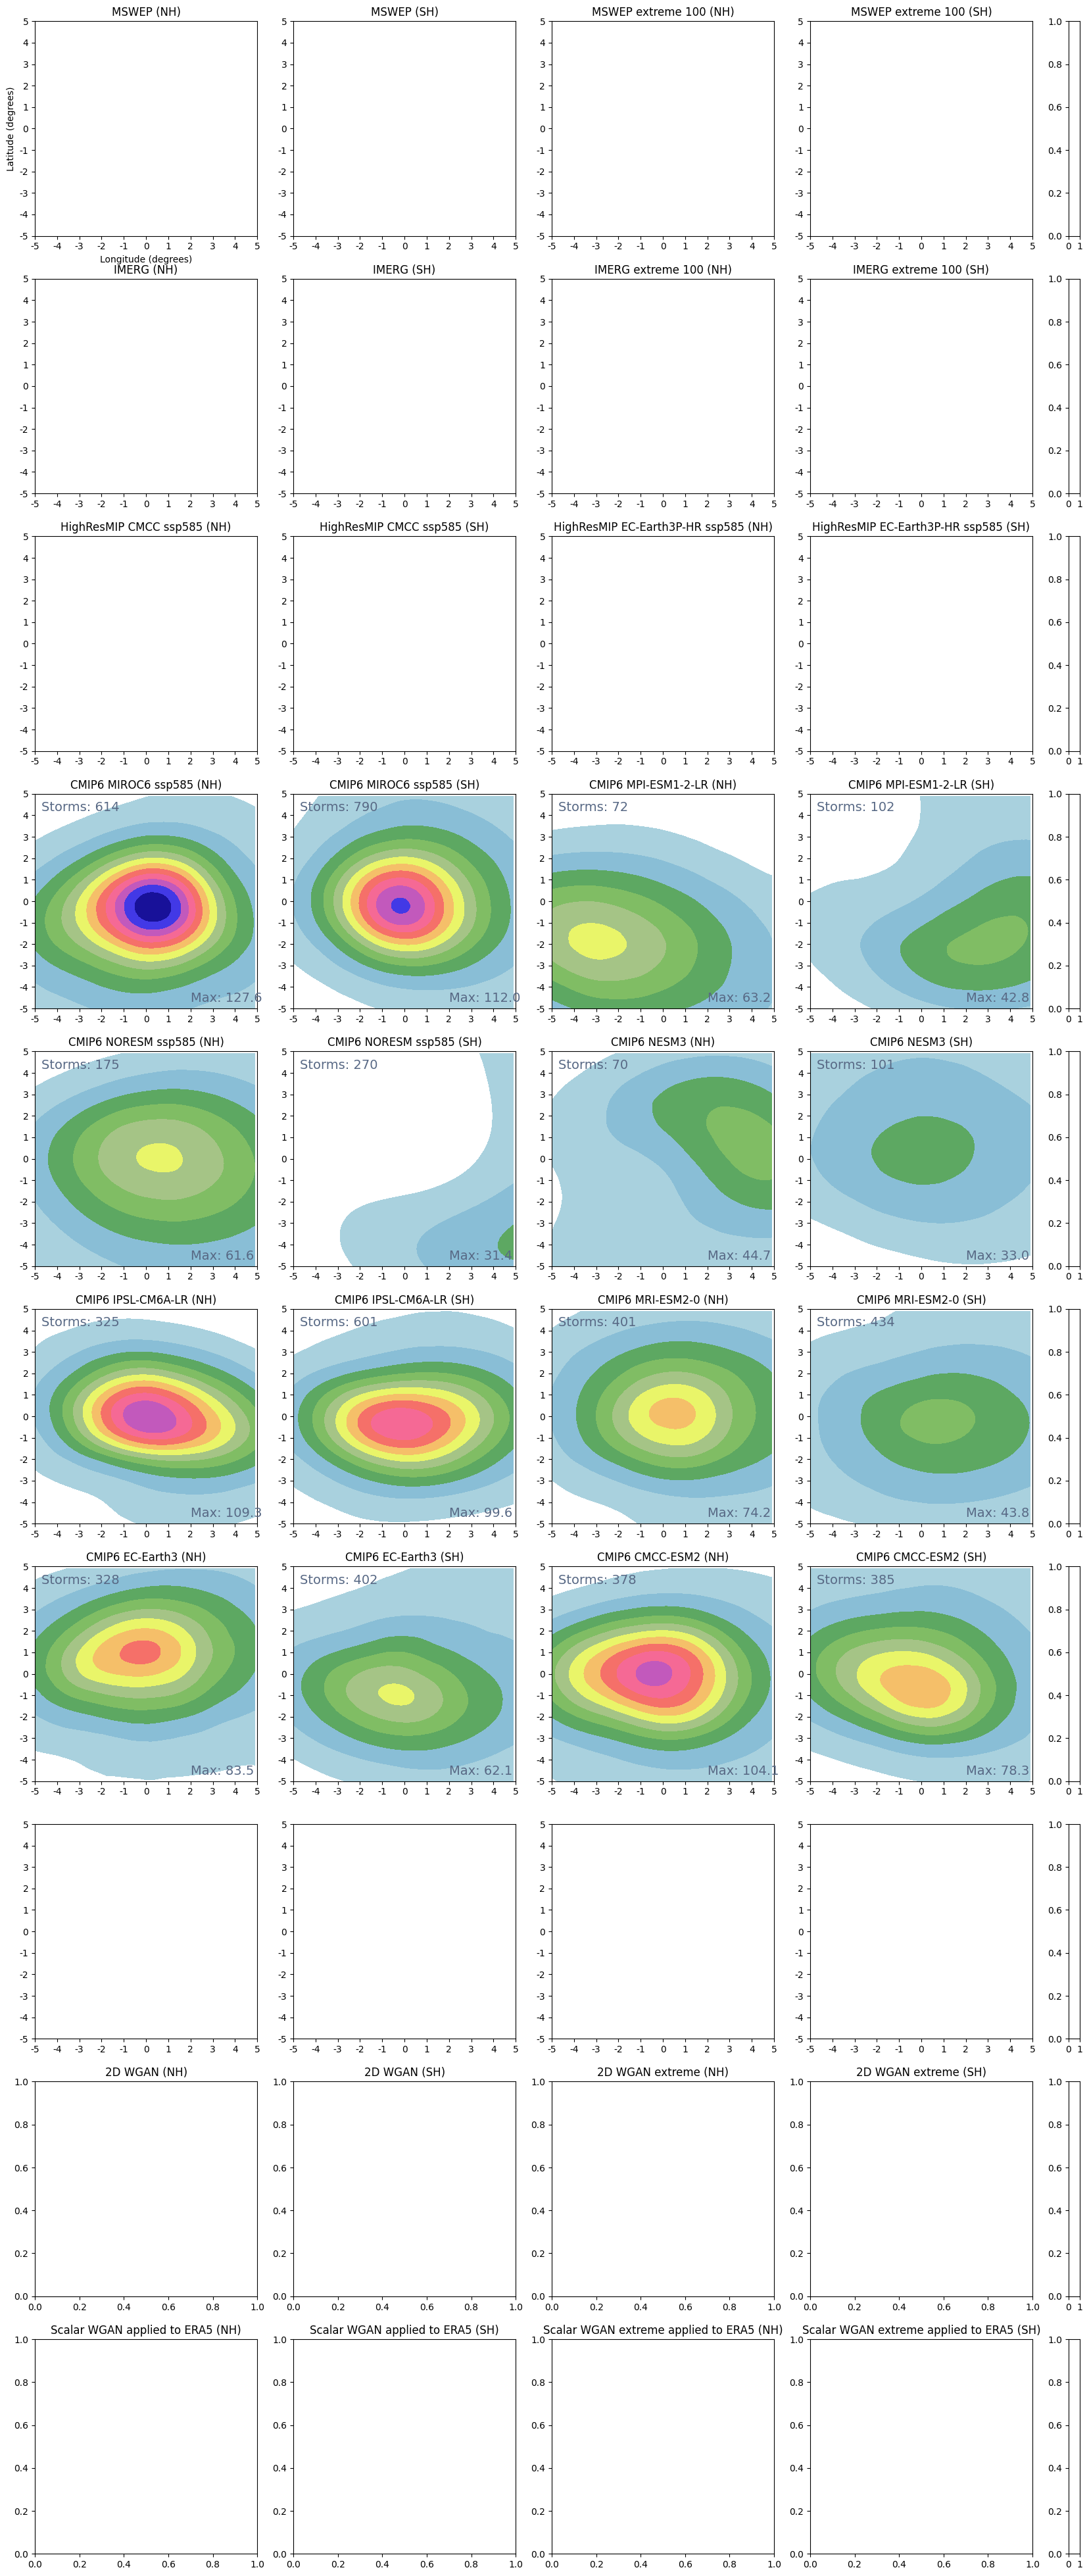

In [13]:

fig,axes = plt.subplots(10,5,figsize=(20.5, 50),gridspec_kw={'width_ratios': [1, 1, 1, 1, 0.05]})

# MSWEP Obs
# im_1 = axes[0,0].contourf(composite_nh,cmap=precip_cmap,levels=[0,10,20,30,40,50,60,70,80,90,100,110,120,130,140],extend='max')
# axes[0,0].annotate('Max: %.1f' % np.max(composite_nh), xy = (90,90), xytext=(70,3),fontsize=14, color='#586985')
# axes[0,0].annotate('Storms: %.0f' % nstorms_nh, xy = (90,90), xytext=(3,92),fontsize=14, color='#586985')
# im_2 = axes[0,1].contourf(composite_sh,cmap=precip_cmap,levels=[0,10,20,30,40,50,60,70,80,90,100,110,120,130,140],extend='max')
# axes[0,1].annotate('Max: %.1f' % np.max(composite_sh), xy = (90,90), xytext=(70,3),fontsize=14, color='#586985')
# axes[0,1].annotate('Storms: %.0f' % nstorms_sh, xy = (90,90), xytext=(3,92),fontsize=14, color='#586985')
# im_3 = axes[0,2].contourf(composite_nh_x,cmap=precip_cmap,levels=[0,10,20,30,40,50,60,70,80,90,100,110,120,130,140],extend='max')
# axes[0,2].annotate('Max: %.1f' % np.max(composite_nh_x), xy = (90,90), xytext=(70,3),fontsize=14, color='#586985')
# axes[0,2].annotate('Storms: %.0f' % nstorms_x_nh, xy = (90,90), xytext=(3,92),fontsize=14, color='#586985')
# im_4 = axes[0,3].contourf(composite_sh_x,cmap=precip_cmap,levels=[0,10,20,30,40,50,60,70,80,90,100,110,120,130,140],extend='max')
# axes[0,3].annotate('Max: %.1f' % np.max(composite_sh_x), xy = (90,90), xytext=(70,3),fontsize=14, color='#586985')
# axes[0,3].annotate('Storms: %.0f' % nstorms_x_sh, xy = (90,90), xytext=(3,92),fontsize=14, color='#586985')

# # IMERG Obs
# im_5 = axes[2,0].contourf(composite_CMCC_ssp585_NH,cmap=precip_cmap,levels=[0,10,20,30,40,50,60,70,80,90,100,110,120,130,140],extend='max')
# axes[2,0].annotate('Max: %.1f' % np.max(composite_CMCC_ssp585_NH), xy = (90,90), xytext=(70,3),fontsize=14, color='#586985')
# im_6 = axes[2,1].contourf(composite_CMCC_ssp585_SH,cmap=precip_cmap,levels=[0,10,20,30,40,50,60,70,80,90,100,110,120,130,140],extend='max')
# axes[2,1].annotate('Max: %.1f' % np.max(composite_CMCC_ssp585_SH), xy = (90,90), xytext=(70,3),fontsize=14, color='#586985')

# im_5b = axes[2,2].contourf(composite_MPI_ssp585_NH,cmap=precip_cmap,levels=[0,10,20,30,40,50,60,70,80,90,100,110,120,130,140],extend='max')
# axes[2,2].annotate('Max: %.1f' % np.max(composite_MPI_ssp585_NH), xy = (90,90), xytext=(70,3),fontsize=14, color='#586985')
# im_6b = axes[2,3].contourf(composite_MPI_ssp585_SH,cmap=precip_cmap,levels=[0,10,20,30,40,50,60,70,80,90,100,110,120,130,140],extend='max')
# axes[2,3].annotate('Max: %.1f' % np.max(composite_MPI_ssp585_SH), xy = (90,90), xytext=(70,3),fontsize=14, color='#586985')

# HighresMIP
# im_5 = axes[2,0].contourf(composite_CMCC_ssp585_NH,cmap=precip_cmap,levels=[0,10,20,30,40,50,60,70,80,90,100,110,120,130,140],extend='max')
# axes[2,0].annotate('Max: %.1f' % np.max(composite_CMCC_ssp585_NH), xy = (90,90), xytext=(70,3),fontsize=14, color='#586985')
# axes[2,0].annotate('Storms: %.0f' % nstorms_CMCC_ssp585_nh, xy = (90,90), xytext=(3,92),fontsize=14, color='#586985')
# im_6 = axes[2,1].contourf(composite_CMCC_ssp585_SH,cmap=precip_cmap,levels=[0,10,20,30,40,50,60,70,80,90,100,110,120,130,140],extend='max')
# axes[2,1].annotate('Max: %.1f' % np.max(composite_CMCC_ssp585_SH), xy = (90,90), xytext=(70,3),fontsize=14, color='#586985')
# axes[2,1].annotate('Storms: %.0f' % nstorms_CMCC_ssp585_sh, xy = (90,90), xytext=(3,92),fontsize=14, color='#586985')

# im_5b = axes[2,2].contourf(composite_ecearthhr_ssp585_NH,cmap=precip_cmap,levels=[0,10,20,30,40,50,60,70,80,90,100,110,120,130,140],extend='max')
# axes[2,2].annotate('Max: %.1f' % np.max(composite_ecearthhr_ssp585_NH), xy = (90,90), xytext=(70,3),fontsize=14, color='#586985')
# axes[2,2].annotate('Storms: %.0f' % nstorms_ecearthhr_ssp585_nh, xy = (90,90), xytext=(3,92),fontsize=14, color='#586985')
# im_6b = axes[2,3].contourf(composite_ecearthhr_ssp585_SH,cmap=precip_cmap,levels=[0,10,20,30,40,50,60,70,80,90,100,110,120,130,140],extend='max')
# axes[2,3].annotate('Max: %.1f' % np.max(composite_ecearthhr_ssp585_SH), xy = (90,90), xytext=(70,3),fontsize=14, color='#586985')
# axes[2,3].annotate('Storms: %.0f' % nstorms_ecearthhr_ssp585_sh, xy = (90,90), xytext=(3,92),fontsize=14, color='#586985')

# CMIP6 ssp585
im_7 = axes[3,0].contourf(composite_miroc6_ssp585_nh,cmap=precip_cmap,levels=[0,10,20,30,40,50,60,70,80,90,100,110,120,130,140],extend='max')
axes[3,0].annotate('Max: %.1f' % np.max(composite_miroc6_ssp585_nh), xy = (90,90), xytext=(70,3),fontsize=14, color='#586985')
axes[3,0].annotate('Storms: %.0f' % nstorms_miroc6_ssp585_nh, xy = (90,90), xytext=(3,92),fontsize=14, color='#586985')
im_8 = axes[3,1].contourf(composite_miroc6_ssp585_sh,cmap=precip_cmap,levels=[0,10,20,30,40,50,60,70,80,90,100,110,120,130,140],extend='max')
axes[3,1].annotate('Max: %.1f' % np.max(composite_miroc6_ssp585_sh), xy = (90,90), xytext=(70,3),fontsize=14, color='#586985')
axes[3,1].annotate('Storms: %.0f' % nstorms_miroc6_ssp585_sh, xy = (90,90), xytext=(3,92),fontsize=14, color='#586985')

im_7b = axes[3,2].contourf(composite_mpi_ssp585_nh,cmap=precip_cmap,levels=[0,10,20,30,40,50,60,70,80,90,100,110,120,130,140],extend='max')
axes[3,2].annotate('Max: %.1f' % np.max(composite_mpi_ssp585_nh), xy = (90,90), xytext=(70,3),fontsize=14, color='#586985')
axes[3,2].annotate('Storms: %.0f' % nstorms_mpi_ssp585_nh, xy = (90,90), xytext=(3,92),fontsize=14, color='#586985')
im_8b = axes[3,3].contourf(composite_mpi_ssp585_sh,cmap=precip_cmap,levels=[0,10,20,30,40,50,60,70,80,90,100,110,120,130,140],extend='max')
axes[3,3].annotate('Max: %.1f' % np.max(composite_mpi_ssp585_sh), xy = (90,90), xytext=(70,3),fontsize=14, color='#586985')
axes[3,3].annotate('Storms: %.0f' % nstorms_mpi_ssp585_sh, xy = (90,90), xytext=(3,92),fontsize=14, color='#586985')

im_7c = axes[4,0].contourf(composite_noresm_ssp585_nh,cmap=precip_cmap,levels=[0,10,20,30,40,50,60,70,80,90,100,110,120,130,140],extend='max')
axes[4,0].annotate('Max: %.1f' % np.max(composite_noresm_ssp585_nh), xy = (90,90), xytext=(70,3),fontsize=14, color='#586985')
axes[4,0].annotate('Storms: %.0f' % nstorms_noresm_ssp585_nh, xy = (90,90), xytext=(3,92),fontsize=14, color='#586985')
im_8c = axes[4,1].contourf(composite_noresm_ssp585_sh,cmap=precip_cmap,levels=[0,10,20,30,40,50,60,70,80,90,100,110,120,130,140],extend='max')
axes[4,1].annotate('Max: %.1f' % np.max(composite_noresm_ssp585_sh), xy = (90,90), xytext=(70,3),fontsize=14, color='#586985')
axes[4,1].annotate('Storms: %.0f' % nstorms_noresm_ssp585_sh, xy = (90,90), xytext=(3,92),fontsize=14, color='#586985')

axes[4,2].contourf(composite_nems_ssp585_nh,cmap=precip_cmap,levels=[0,10,20,30,40,50,60,70,80,90,100,110,120,130,140],extend='max')
axes[4,2].annotate('Max: %.1f' % np.max(composite_nems_ssp585_nh), xy = (90,90), xytext=(70,3),fontsize=14, color='#586985')
axes[4,2].annotate('Storms: %.0f' % nstorms_nems_ssp585_nh, xy = (90,90), xytext=(3,92),fontsize=14, color='#586985')
axes[4,3].contourf(composite_nems_ssp585_sh,cmap=precip_cmap,levels=[0,10,20,30,40,50,60,70,80,90,100,110,120,130,140],extend='max')
axes[4,3].annotate('Max: %.1f' % np.max(composite_nems_ssp585_sh), xy = (90,90), xytext=(70,3),fontsize=14, color='#586985')
axes[4,3].annotate('Storms: %.0f' % nstorms_nems_ssp585_sh, xy = (90,90), xytext=(3,92),fontsize=14, color='#586985')


# im_7d = axes[4,2].contourf(composite_taiesm_ssp585_nh,cmap=precip_cmap,levels=[0,10,20,30,40,50,60,70,80,90,100,110,120,130,140],extend='max')
# axes[4,2].annotate('Max: %.1f' % np.max(composite_taiesm_ssp585_nh), xy = (90,90), xytext=(70,3),fontsize=14, color='#586985')
# axes[4,2].annotate('Storms: %.0f' % nstorms_taiesm_ssp585_nh, xy = (90,90), xytext=(3,92),fontsize=14, color='#586985')
# im_8c = axes[4,3].contourf(composite_taiesm_ssp585_sh,cmap=precip_cmap,levels=[0,10,20,30,40,50,60,70,80,90,100,110,120,130,140],extend='max')
# axes[4,3].annotate('Max: %.1f' % np.max(composite_taiesm_ssp585_sh), xy = (90,90), xytext=(70,3),fontsize=14, color='#586985')
# axes[4,3].annotate('Storms: %.0f' % nstorms_taiesm_ssp585_sh, xy = (90,90), xytext=(3,92),fontsize=14, color='#586985')

axes[5,0].contourf(composite_ipsl_ssp585_nh,cmap=precip_cmap,levels=[0,10,20,30,40,50,60,70,80,90,100,110,120,130,140],extend='max')
axes[5,0].annotate('Max: %.1f' % np.max(composite_ipsl_ssp585_nh), xy = (90,90), xytext=(70,3),fontsize=14, color='#586985')
axes[5,0].annotate('Storms: %.0f' % nstorms_ipsl_ssp585_nh, xy = (90,90), xytext=(3,92),fontsize=14, color='#586985')
axes[5,1].contourf(composite_ipsl_ssp585_sh,cmap=precip_cmap,levels=[0,10,20,30,40,50,60,70,80,90,100,110,120,130,140],extend='max')
axes[5,1].annotate('Max: %.1f' % np.max(composite_ipsl_ssp585_sh), xy = (90,90), xytext=(70,3),fontsize=14, color='#586985')
axes[5,1].annotate('Storms: %.0f' % nstorms_ipsl_ssp585_sh, xy = (90,90), xytext=(3,92),fontsize=14, color='#586985')

axes[5,2].contourf(composite_mri_ssp585_nh,cmap=precip_cmap,levels=[0,10,20,30,40,50,60,70,80,90,100,110,120,130,140],extend='max')
axes[5,2].annotate('Max: %.1f' % np.max(composite_mri_ssp585_nh), xy = (90,90), xytext=(70,3),fontsize=14, color='#586985')
axes[5,2].annotate('Storms: %.0f' % nstorms_mri_ssp585_nh, xy = (90,90), xytext=(3,92),fontsize=14, color='#586985')
axes[5,3].contourf(composite_mri_ssp585_sh,cmap=precip_cmap,levels=[0,10,20,30,40,50,60,70,80,90,100,110,120,130,140],extend='max')
axes[5,3].annotate('Max: %.1f' % np.max(composite_mri_ssp585_sh), xy = (90,90), xytext=(70,3),fontsize=14, color='#586985')
axes[5,3].annotate('Storms: %.0f' % nstorms_mri_ssp585_sh, xy = (90,90), xytext=(3,92),fontsize=14, color='#586985')

axes[6,0].contourf(composite_ecearth_ssp585_nh,cmap=precip_cmap,levels=[0,10,20,30,40,50,60,70,80,90,100,110,120,130,140],extend='max')
axes[6,0].annotate('Max: %.1f' % np.max(composite_ecearth_ssp585_nh), xy = (90,90), xytext=(70,3),fontsize=14, color='#586985')
axes[6,0].annotate('Storms: %.0f' % nstorms_ecearth_ssp585_nh, xy = (90,90), xytext=(3,92),fontsize=14, color='#586985')
axes[6,1].contourf(composite_ecearth_ssp585_sh,cmap=precip_cmap,levels=[0,10,20,30,40,50,60,70,80,90,100,110,120,130,140],extend='max')
axes[6,1].annotate('Max: %.1f' % np.max(composite_ecearth_ssp585_sh), xy = (90,90), xytext=(70,3),fontsize=14, color='#586985')
axes[6,1].annotate('Storms: %.0f' % nstorms_ecearth_ssp585_sh, xy = (90,90), xytext=(3,92),fontsize=14, color='#586985')

axes[6,2].contourf(composite_cmcclr_ssp585_nh,cmap=precip_cmap,levels=[0,10,20,30,40,50,60,70,80,90,100,110,120,130,140],extend='max')
axes[6,2].annotate('Max: %.1f' % np.max(composite_cmcclr_ssp585_nh), xy = (90,90), xytext=(70,3),fontsize=14, color='#586985')
axes[6,2].annotate('Storms: %.0f' % nstorms_cmcclr_ssp585_nh, xy = (90,90), xytext=(3,92),fontsize=14, color='#586985')
axes[6,3].contourf(composite_cmcclr_ssp585_sh,cmap=precip_cmap,levels=[0,10,20,30,40,50,60,70,80,90,100,110,120,130,140],extend='max')
axes[6,3].annotate('Max: %.1f' % np.max(composite_cmcclr_ssp585_sh), xy = (90,90), xytext=(70,3),fontsize=14, color='#586985')
axes[6,3].annotate('Storms: %.0f' % nstorms_cmcclr_ssp585_sh, xy = (90,90), xytext=(3,92),fontsize=14, color='#586985')

# axes[7,0].contourf(composite_bcc_ssp585_nh,cmap=precip_cmap,levels=[0,10,20,30,40,50,60,70,80,90,100,110,120,130,140],extend='max')
# axes[7,0].annotate('Max: %.1f' % np.max(composite_bcc_ssp585_nh), xy = (90,90), xytext=(70,3),fontsize=14, color='#586985')
# axes[7,0].annotate('Storms: %.0f' % nstorms_bcc_ssp585_nh, xy = (90,90), xytext=(3,92),fontsize=14, color='#586985')
# axes[7,1].contourf(composite_bcc_ssp585_sh,cmap=precip_cmap,levels=[0,10,20,30,40,50,60,70,80,90,100,110,120,130,140],extend='max')
# axes[7,1].annotate('Max: %.1f' % np.max(composite_bcc_ssp585_sh), xy = (90,90), xytext=(70,3),fontsize=14, color='#586985')
# axes[7,1].annotate('Storms: %.0f' % nstorms_bcc_ssp585_sh, xy = (90,90), xytext=(3,92),fontsize=14, color='#586985')


# im_7 = axes[4,0].contourf(composite_miroc6_ssp585_nh,cmap=precip_cmap,levels=[0,10,20,30,40,50,60,70,80,90,100,110,120,130,140],extend='max')
# axes[4,0].annotate('Max: %.1f' % np.max(composite_miroc6_ssp585_nh), xy = (90,90), xytext=(70,3),fontsize=14, color='#586985')
# im_8 = axes[4,1].contourf(composite_miroc6_ssp585_sh,cmap=precip_cmap,levels=[0,10,20,30,40,50,60,70,80,90,100,110,120,130,140],extend='max')
# axes[4,1].annotate('Max: %.1f' % np.max(composite_miroc6_ssp585_sh), xy = (90,90), xytext=(70,3),fontsize=14, color='#586985')




# OG WGAN
# im_og_nh = axes[8,0].contourf(composite_og_nh,cmap=precip_cmap,levels=[0,10,20,30,40,50,60,70,80,90,100,110,120,130,140],extend='max')
# axes[8,0].annotate('Max: %.1f' % np.max(composite_og_nh), xy = (90,90), xytext=(70,3),fontsize=14, color='#586985')
# im_og_sh = axes[8,1].contourf(composite_og_sh,cmap=precip_cmap,levels=[0,10,20,30,40,50,60,70,80,90,100,110,120,130,140],extend='max')
# axes[8,1].annotate('Max: %.1f' % np.max(composite_og_sh), xy = (90,90), xytext=(70,3),fontsize=14, color='#586985')
# im_og_x_nh = axes[8,2].contourf(composite_og_x_nh,cmap=precip_cmap,levels=[0,10,20,30,40,50,60,70,80,90,100,110,120,130,140],extend='max')
# axes[8,2].annotate('Max: %.1f' % np.max(composite_og_x_nh), xy = (90,90), xytext=(70,3),fontsize=14, color='#586985')
# im_og_x_sh = axes[8,3].contourf(composite_og_x_sh,cmap=precip_cmap,levels=[0,10,20,30,40,50,60,70,80,90,100,110,120,130,140],extend='max')
# axes[8,3].annotate('Max: %.1f' % np.max(composite_og_x_sh), xy = (90,90), xytext=(70,3),fontsize=14, color='#586985')

# # Scalar WGAN
# im_pred_nh = axes[9,0].contourf(composite_wgan_nh,cmap=precip_cmap,levels=[0,10,20,30,40,50,60,70,80,90,100,110,120,130,140],extend='max')
# axes[9,0].annotate('Max: %.1f' % np.max(composite_wgan_nh), xy = (90,90), xytext=(70,3),fontsize=14, color='#586985')
# im_pred_sh = axes[9,1].contourf(composite_wgan_sh,cmap=precip_cmap,levels=[0,10,20,30,40,50,60,70,80,90,100,110,120,130,140],extend='max')
# axes[9,1].annotate('Max: %.1f' % np.max(composite_wgan_sh), xy = (90,90), xytext=(70,3),fontsize=14, color='#586985')

# Set the tick positions
t_p = [0,10,20,30,40,50,60,70,80,90,100]
t_l = [-5,-4,-3,-2,-1,0,1,2,3,4,5]
for i in range(8):
	for j in range(4):
		axes[i,j].set_xticks(t_p)
		axes[i,j].set_yticks(t_p)
		# Set the tick labels
		axes[i,j].set_xticklabels(t_l)
		axes[i,j].set_yticklabels(t_l)


axes[0,0].set_title('MSWEP (NH)')
axes[0,0].set_xlabel('Longitude (degrees)')
axes[0,0].set_ylabel('Latitude (degrees)')
axes[0,1].set_title('MSWEP (SH)')
# axes[0,1].set_xlabel('Longitude (degrees)')
# add **font to change font

axes[0,2].set_title('MSWEP extreme 100 (NH)')
axes[0,3].set_title('MSWEP extreme 100 (SH)')

axes[1,0].set_title('IMERG (NH)')
axes[1,1].set_title('IMERG (SH)')
axes[1,2].set_title('IMERG extreme 100 (NH)')
axes[1,3].set_title('IMERG extreme 100 (SH)')

axes[2,0].set_title('HighResMIP CMCC ssp585 (NH)')
axes[2,1].set_title('HighResMIP CMCC ssp585 (SH)')
axes[2,2].set_title('HighResMIP EC-Earth3P-HR ssp585 (NH)')
axes[2,3].set_title('HighResMIP EC-Earth3P-HR ssp585 (SH)')

axes[3,0].set_title('CMIP6 MIROC6 ssp585 (NH)')
axes[3,1].set_title('CMIP6 MIROC6 ssp585 (SH)')
axes[3,2].set_title('CMIP6 MPI-ESM1-2-LR (NH)')
axes[3,3].set_title('CMIP6 MPI-ESM1-2-LR (SH)')

axes[4,0].set_title('CMIP6 NORESM ssp585 (NH)')
axes[4,1].set_title('CMIP6 NORESM ssp585 (SH)')
axes[4,2].set_title('CMIP6 NESM3 (NH)')
axes[4,3].set_title('CMIP6 NESM3 (SH)')

axes[5,0].set_title('CMIP6 IPSL-CM6A-LR (NH)')
axes[5,1].set_title('CMIP6 IPSL-CM6A-LR (SH)')
axes[5,2].set_title('CMIP6 MRI-ESM2-0 (NH)')
axes[5,3].set_title('CMIP6 MRI-ESM2-0 (SH)')

axes[6,0].set_title('CMIP6 EC-Earth3 (NH)')
axes[6,1].set_title('CMIP6 EC-Earth3 (SH)')
axes[6,2].set_title('CMIP6 CMCC-ESM2 (NH)')
axes[6,3].set_title('CMIP6 CMCC-ESM2 (SH)')

# axes[7,0].set_title('CMIP6 BCC-CSM2-MR (NH)')
# axes[7,1].set_title('CMIP6 BCC-CSM2-MR (SH)')


axes[8,0].set_title('2D WGAN (NH)')
axes[8,1].set_title('2D WGAN (SH)')
axes[8,2].set_title('2D WGAN extreme (NH)')
axes[8,3].set_title('2D WGAN extreme (SH)')

axes[9,0].set_title('Scalar WGAN applied to ERA5 (NH)')
axes[9,1].set_title('Scalar WGAN applied to ERA5 (SH)')
axes[9,2].set_title('Scalar WGAN extreme applied to ERA5 (NH)')
axes[9,3].set_title('Scalar WGAN extreme applied to ERA5 (SH)')




# plt.colorbar(im_2,ticks=[0,20,40,60,80,100,120,140],cax=axes[0,4])
# plt.colorbar(im_5,ticks=[0,20,40,60,80,100,120,140],cax=axes[1,4])
# plt.colorbar(im_5,ticks=[0,20,40,60,80,100,120,140],cax=axes[2,4])
# plt.colorbar(im_5,ticks=[0,20,40,60,80,100,120,140],cax=axes[3,4])
# plt.colorbar(im_5,ticks=[0,20,40,60,80,100,120,140],cax=axes[4,4])
# plt.colorbar(im_5,ticks=[0,20,40,60,80,100,120,140],cax=axes[5,4])
# plt.colorbar(im_5,ticks=[0,20,40,60,80,100,120,140],cax=axes[6,4])
# plt.colorbar(im_5,ticks=[0,20,40,60,80,100,120,140],cax=axes[7,4])
# plt.colorbar(im_5,ticks=[0,20,40,60,80,100,120,140],cax=axes[8,4])


plt.savefig('composite_rain_ssp.png',bbox_inches='tight')

In [14]:
# method for composite rain plot:
# for each storm, sum up the rain along its track, centred on centre of TC.
# convert units from mm/3hr rainfall to mm/day rainfall. THis requires knowing if the storm timesteps are sampled every 3 hours or every 6 hours
# for 3 hourly storms you add up and divide by number of timesteps (storm duration/number of hours storm was alive for as a TC) to get mm/hr then multiply by 24
# for 6 hourly storms you add up rain at 6 hour points and interpolate to get values for 3 hourly points (otherwise you're only adding up half the rainfall). Then divide by number of timesteps and multiply by 24
# split into nh and sh
# do the mean for each hemisphere


# save everything
fig_dir = '/user/home/al18709/work/figures/figure_1'

np.save(composite_nh,'composite_nh.npy')
np.save(composite_sh,'composite_sh.npy')
np.save(composite_nh_x,'composite_nh_x.npy')
np.save(composite_sh_x,'composite_sh_x.npy')


# HighresMIP
np.save(composite_CMCC_ssp585_NH,'composite_CMCC_ssp585_NH.npy')
np.save(composite_CMCC_ssp585_SH,'composite_CMCC_ssp585_SH.npy')

np.save(composite_ecearthhr_ssp585_NH,'composite_ecearthhr_ssp585_NH.npy')
np.save(composite_ecearthhr_ssp585_SH,'composite_ecearthhr_ssp585_SH.npy')

# CMIP6 ssp585
np.save(composite_miroc6_ssp585_nh,'composite_miroc6_ssp585_nh.npy')
np.save(composite_miroc6_ssp585_sh,'composite_miroc6_ssp585_sh.npy')

np.save(composite_mpi_ssp585_nh,'composite_mpi_ssp585_nh.npy')
np.save(composite_mpi_ssp585_sh,'composite_mpi_ssp585_sh.npy')

np.save(composite_noresm_ssp585_nh,'composite_noresm_ssp585_nh.npy')
np.save(composite_noresm_ssp585_sh,'composite_noresm_ssp585_sh.npy')

np.save(composite_taiesm_ssp585_nh,'composite_taiesm_ssp585_nh.npy')
np.save(composite_taiesm_ssp585_sh,'composite_taiesm_ssp585_sh.npy')

np.save(composite_ipsl_ssp585_nh,'composite_ipsl_ssp585_nh.npy')
np.save(composite_ipsl_ssp585_sh,'composite_ipsl_ssp585_sh.npy')

np.save(composite_mri_ssp585_nh,'composite_mri_ssp585_nh.npy')
np.save(composite_mri_ssp585_sh,'composite_mri_ssp585_sh.npy')

np.save(composite_ecearth_ssp585_nh,'composite_ecearth_ssp585_nh.npy')
np.save(composite_ecearth_ssp585_sh,'composite_ecearth_ssp585_sh.npy')

np.save(composite_cmcclr_ssp585_nh,'composite_cmcclr_ssp585_nh.npy')
np.save(composite_cmcclr_ssp585_sh,'composite_cmcclr_ssp585_sh.npy')

np.save(composite_bcc_ssp585_nh,'composite_bcc_ssp585_nh.npy')
np.save(composite_bcc_ssp585_sh,'composite_bcc_ssp585_sh.npy')

np.save(composite_nems_ssp585_nh,'composite_nems_ssp585_nh.npy')
np.save(composite_nems_ssp585_sh,'composite_nems_ssp585_sh.npy')


# OG WGAN
np.save(composite_og_nh,'composite_og_nh.npy')
np.save(composite_og_sh,'composite_og_sh.npy')
np.save(composite_og_x_nh,'composite_og_x_nh.npy')
np.save(composite_og_x_nh,'composite_og_x_nh.npy')
np.save(composite_og_x_sh,'composite_og_x_sh.npy')

# Scalar WGAN
np.save(composite_wgan_nh,'composite_wgan_nh.npy')
np.save(composite_wgan_sh,'composite_wgan_sh.npy')


NameError: name 'composite_nh' is not defined

In [ ]:
# TODO: add max rain to bottom right of each subplot
# TODO: do ensemble not just each model. 6 runs?